---
---

<h1><center><ins>Exercise Sheet 7</ins></center></h1>
<h2><center>Numerical Methods <br><br>

---
---

In [25]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1 - Backward Euler:

Consider the following first-order ODE:

$$ \frac{d y}{dt} = - 3 y \ , $$

**(A)** Solve this ODE with **your own forward Euler** implementation for $0\leq t\leq20$. Use the following step sizes: $\Delta t = 0.1, 0.25, 0.5, 0.75$, and plot the numerical solution for all four step sizes in four different figures. Also compare it with the exact analytical solution in the corresponding plot. Discuss your findings.

**(B)** Now implement **your own backward Euler** implementation and repeat all the steps from **(A)**. What do you notice?

**(C)** What complication arises in the implementation of the backward Euler, if we replace the right hand side of the ODE with $ (1-\frac{y}{3})y $? What kind of numerical methods already known from the lecture can you use to solve the arising equation? Please implement them to solve this ODE with the backward Euler and compare your solution with analytic one by plotting them in a figure.

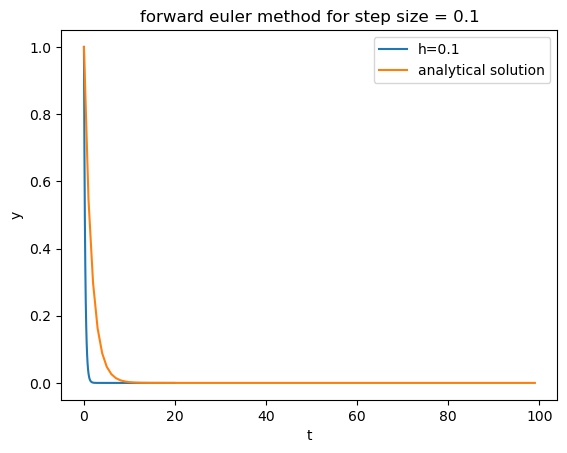

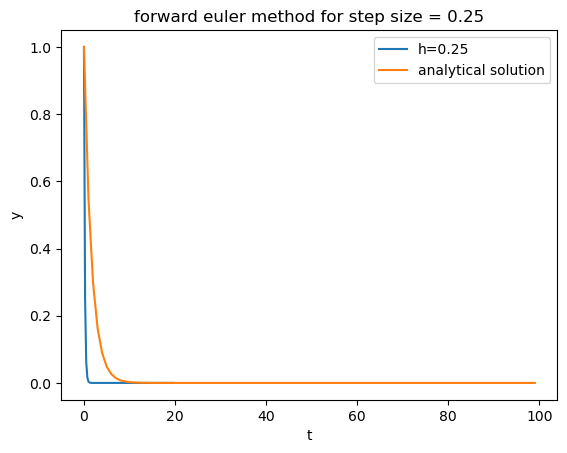

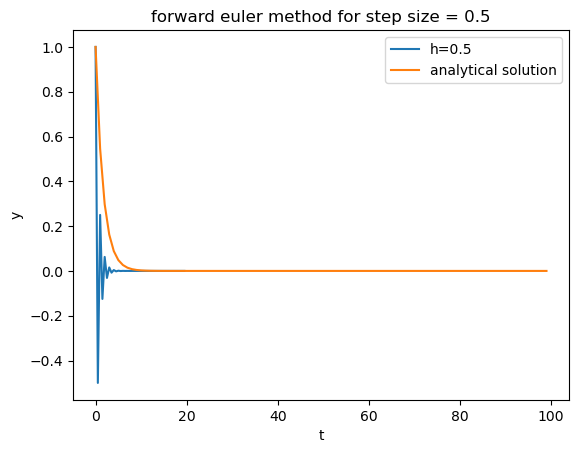

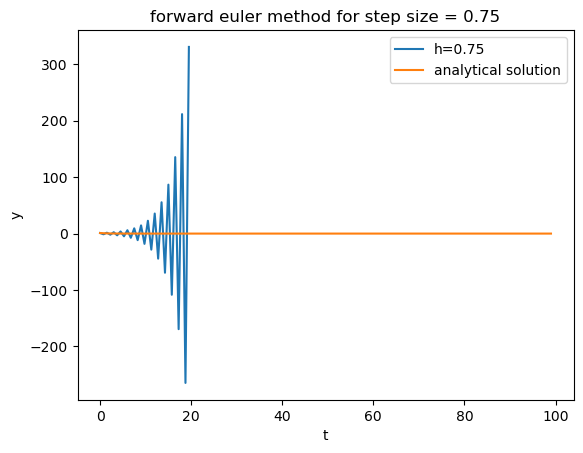

In [26]:
#the forward euler method uses the derivative at the current point to estimate the value of the function at the next point 
#the formula for this is y_n+1 = y_n + h*f(t_n, y_n)
#here h is the step size, f(t_n, y_n) is the derivative of the function at the current point, and y_n is the value of the function at the current point
#the forward euler method is a first order method, meaning that the error in the method is proportional to the step size squared

#first- order ODE
def f(t, y):
    return -3*y

#time intervall
#i make four different intervalls since i have four different step sizes
t1 = (0, 20, 0.1)
t2 = (0, 20, 0.25)
t3 = (0, 20, 0.5)
t4 = (0, 20, 0.75)

#defining the analytical solution of the first-order ODE
t = np.linspace(0, 20, 100)
def y(t):
    return np.exp(-3*t)

#i now calculate the numerical solutions (forward euler method) of the first-order ODE for step size = 0.1
def euler_delta1(t1):
    
    h1 = t1[2] #step size
    t_h1 = np.arange(t1[0], t1[1], h1) #time intervall
    y_h1 = np.zeros(len(t_h1)) #empty array to store the values of the function
    y = 1 #initial value which i get from the initial condition y(0) = 1
    y_h1[0] = y #initial value

    for i in range(1, len(t_h1)):
        y = y + h1*f(t_h1[i-1], y) #forward euler method
        y_h1[i] = y

    return t_h1, y_h1

plt.figure()
plt.plot(euler_delta1(t1)[0], euler_delta1(t1)[1], label='h=0.1')
plt.plot(y(t), label='analytical solution')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('forward euler method for step size = 0.1')
plt.show()

#calculate euler for step size = 0.25
def euler_delta1(t2):
    
    h2 = t2[2] 
    t_h2 = np.arange(t2[0], t2[1], h2) 
    y_h2 = np.zeros(len(t_h2))
    y = 1 
    y_h2[0] = y 

    for i in range(1, len(t_h2)):
        y = y + h2*f(t_h2[i-1], y) 
        y_h2[i] = y

    return t_h2, y_h2

plt.figure()
plt.plot(euler_delta1(t2)[0], euler_delta1(t2)[1], label='h=0.25')
plt.plot(y(t), label='analytical solution')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('forward euler method for step size = 0.25')
plt.show()

#calculate euler for step size = 0.5
def euler_delta1(t3):
    
    h3 = t3[2] 
    t_h3 = np.arange(t3[0], t3[1], h3) 
    y_h3 = np.zeros(len(t_h3)) 
    y = 1 
    y_h3[0] = y 

    for i in range(1, len(t_h3)):
        y = y + h3*f(t_h3[i-1], y)
        y_h3[i] = y

    return t_h3, y_h3

plt.figure()
plt.plot(euler_delta1(t3)[0], euler_delta1(t3)[1], label='h=0.5')
plt.plot(y(t), label='analytical solution')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('forward euler method for step size = 0.5')
plt.show()

#calculate euler for step size = 0.75
def euler_delta1(t4):
    
    h4 = t4[2] 
    t_h4 = np.arange(t3[0], t3[1], h4) 
    y_h4 = np.zeros(len(t_h4)) 
    y = 1 
    y_h4[0] = y 

    for i in range(1, len(t_h4)):
        y = y + h4*f(t_h4[i-1], y) 
        y_h4[i] = y

    return t_h4, y_h4

plt.figure()
plt.plot(euler_delta1(t4)[0], euler_delta1(t4)[1], label='h=0.75')
plt.plot(y(t), label='analytical solution')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('forward euler method for step size = 0.75')
plt.show()

h1 and h2: basically the same, relatively good approximation  
h3: positive region good approximation, but negative region also there  
h4: doesn't approximate well at all

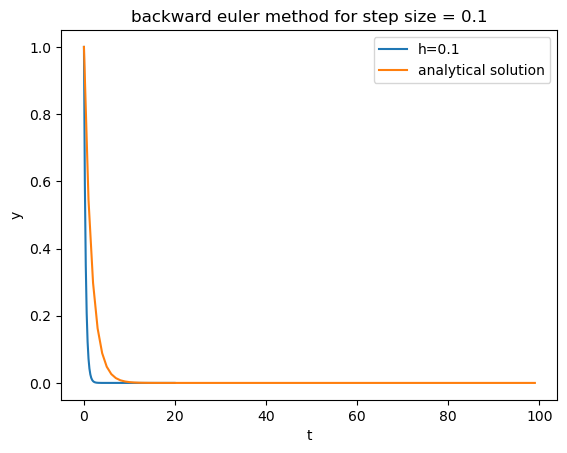

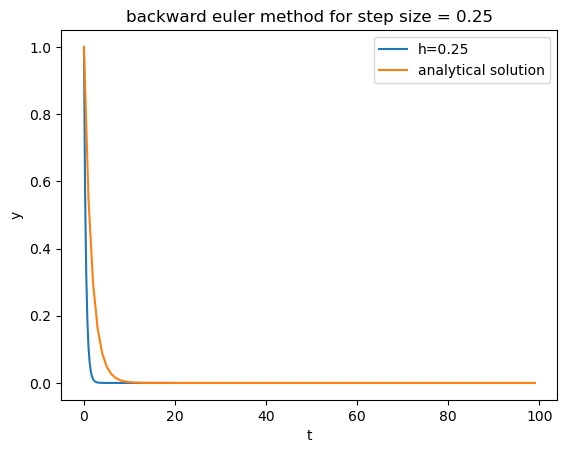

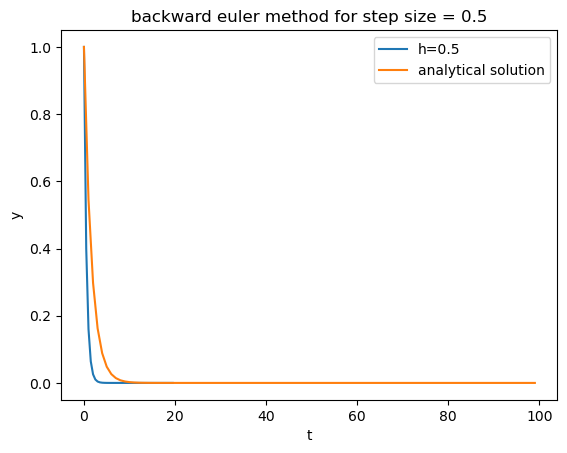

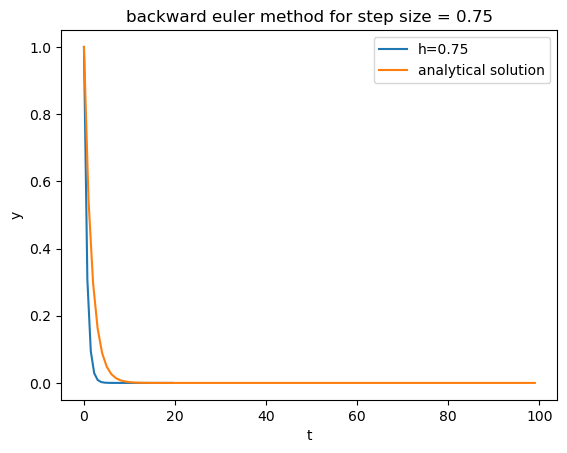

In [27]:
#i now have to do the exact same thing but using the backward euler method
#the backward euler ethod uses the derivative at the next point to estimate the value of the function at the current point
#the formula for this is y_n+1 = y_n/(1 + 3*h)
#here h is the step size, f(t_n+1, y_n+1) is the derivative of the function at the next point, and y_n+1 is the value of the function at the next point
#the backward euler method is a first order method, meaning that the error in the method is proportional to the step size squared

#calculate the numerical solutions (backward euler method) of the first-order ODE for the first step size
def euler_delta1(t1):
    
    h1 = t1[2] #step size
    t_h1 = np.arange(t1[0], t1[1], h1) #time intervall
    y_h1 = np.zeros(len(t_h1)) #empty array to store the values of the function
    y = 1 #initial value which i get from the initial condition y(0) = 1
    y_h1[0] = y #initial value

    for i in range(1, len(t_h1)):
        y =  y/(1 + 3*h1) #backward euler method
        y_h1[i] = y

    return t_h1, y_h1

plt.figure()
plt.plot(euler_delta1(t1)[0], euler_delta1(t1)[1], label='h=0.1')
plt.plot(y(t), label='analytical solution')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('backward euler method for step size = 0.1')
plt.show()

#calculate euler for step size = 0.25
def euler_delta1(t2):
    
    h2 = t2[2] 
    t_h2 = np.arange(t2[0], t2[1], h2) 
    y_h2 = np.zeros(len(t_h2)) 
    y = 1 
    y_h2[0] = y 

    for i in range(1, len(t_h2)):
        y =  y/(1 + 3*h2) 
        y_h2[i] = y

    return t_h2, y_h2

plt.figure()
plt.plot(euler_delta1(t2)[0], euler_delta1(t2)[1], label='h=0.25')
plt.plot(y(t), label='analytical solution')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('backward euler method for step size = 0.25')
plt.show()

#calculate euler for step size = 0.5
def euler_delta1(t3):
    
    h3 = t3[2] 
    t_h3 = np.arange(t3[0], t3[1], h3) 
    y_h3 = np.zeros(len(t_h3)) 
    y = 1 
    y_h3[0] = y 

    for i in range(1, len(t_h3)):
        y =  y/(1 + 3*h3)
        y_h3[i] = y

    return t_h3, y_h3

plt.figure()
plt.plot(euler_delta1(t3)[0], euler_delta1(t3)[1], label='h=0.5')
plt.plot(y(t), label='analytical solution')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('backward euler method for step size = 0.5')
plt.show()

#calculate euler for step size = 0.75
def euler_delta1(t4):
    
    h4 = t4[2] 
    t_h4 = np.arange(t3[0], t3[1], h4)
    y_h4 = np.zeros(len(t_h4))
    y = 1 
    y_h4[0] = y 

    for i in range(1, len(t_h4)):
        y =  y/(1 + 3*h4) 
        y_h4[i] = y

    return t_h4, y_h4

plt.figure()
plt.plot(euler_delta1(t4)[0], euler_delta1(t4)[1], label='h=0.75')
plt.plot(y(t), label='analytical solution')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('backward euler method for step size = 0.75')
plt.show()

way better approximation for all step sizes

by changing the right hand side, the function/derivative becomes non-linear  
because of this it is more difficult to solve 

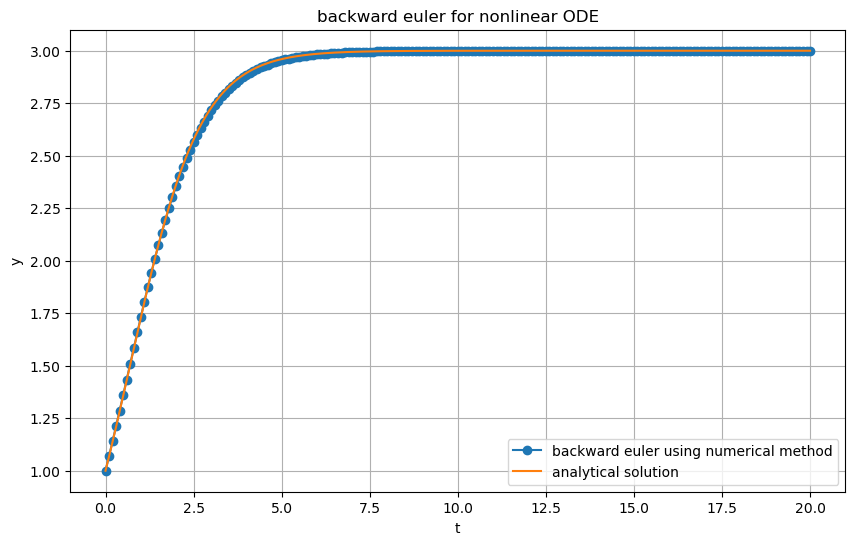

In [28]:
#defining the function
def f(y_next, y_curr, h):
    return y_next - y_curr - h * (1 - y_next / 3) * y_next 

#defining the derivative of the function
def df_dy(y_next, h):
    return 1 - h * (1 - 2 * y_next / 3)

#defining the backward euler method for nonlinear ODE
def backward_euler_nonlinear(y0, t0, t_end, h):
    t_values = np.arange(t0, t_end + h, h) #time intervall
    y_values = np.zeros(len(t_values)) #empty array to store the values of the function
    y_values[0] = y0 #initial value

    #backward euler method
    for i in range(1, len(t_values)):
        y_curr = y_values[i - 1] #current value
        y_next = y_curr #next value
        
        #to solve this system i use the newton method
        tol = 1e-6 #tolerance
        max_iter = 100 #maximum number of iterations

        #newton method
        for _ in range(max_iter):
            f_val = f(y_next, y_curr, h) #function value
            df_val = df_dy(y_next, h) #derivative value
            y_next_new = y_next - f_val / df_val #new value
            if abs(y_next_new - y_next) < tol: #check if the difference is smaller than the tolerance, if yes i break the loop
                y_next = y_next_new #new value
                break
            y_next = y_next_new 
        y_values[i] = y_next #store the value
    
    return t_values, y_values

#define the analytical solution
def analytical_solution(t):
    return 3 / (1 + 2 * np.exp(-t))

#initial conditions
y0 = 1
t0 = 0
t_end = 20
h = 0.1

#calculate the numerical solution
t_values, y_values = backward_euler_nonlinear(y0, t0, t_end, h)


t_exact = np.linspace(t0, t_end, 1000) #time intervall
y_exact = analytical_solution(t_exact) #analytical solution

plt.figure(figsize=(10, 6))
plt.plot(t_values, y_values, 'o-', label='backward euler using numerical method')
plt.plot(t_exact, y_exact, '-', label='analytical solution')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.title('backward euler for nonlinear ODE')
plt.grid()
plt.show()


## Exercise 2 - Backward Euler Part 2:

Consider now the following second-order ODE:

$$ y^{\prime\prime} + 6 y^{\prime} + 5y = 10, $$

with initial conditions of $y(0) = 0$ and $y^{\prime}(0) = 5.$

**(A)** Solve this ODE with **your own backward Euler** implementation for $0\leq t\leq5$. What is the linear system of equation that you have to solve? (write it down in matrix notation). Within **your own backward Euler** implementation you are free to solve this system of equation using either numerical methods (e.g. np.linalg.solve) or invert the matrix by hand. Use a step size of 0.1 and 0.5. Plot the absolute error of the numerical solutions for both steps sizes compared to the exact solution. The exact solution is 

$$ y(t) = -\frac{3}{4}e^{-5t} -\frac{5}{4}e^{-t} + 2. $$


**(B)** Repeat **(A)** using **forward Euler**. What do you notice?

## Exercise 3 - More Oscillators:

Consider again a system of a mass that is attached to a spring. We have seen (look at Exercise Sheet 6 Exercise Number 3) that the resuling ODE describing such a system is of the form

$$ \frac{d^2 x}{dt^2} = - \frac{k}{m} x \ , $$

where $m$ is the mass of your particle, $k$ is the spring constant, and $x$ is the displacement from the equilibrium position.

**(A)** Implement the Leapfrog integration in oder to solve this ODE. Follow the section "Algorithm" under https://en.wikipedia.org/wiki/Leapfrog_integration. Consider the same values for the constants and initial conditions from Exercise Sheet 6 and plot your result by comparing with the analytic solution. Is the accuracy the same as for the Kunge-Kutta method? Why is this integrator called leapfrog? Name one advantage of the leapfrog integration over other methods such as Kunge-Kutta.

Consider now the damped oscillator of the form:

$$ \frac{d^2 x}{dt^2} = - \frac{k}{m} x - \frac{D}{m} \frac{dx}{dt} \ , $$

where $D$ is an additional friction coefficient.

**(B)**
Solve this ODE with the Runge-Kutta method. Either use the build-in python function or your own implementation. Play around with different values for $D$ and compare it to the analytic solution (you may use : https://lemesurierb.people.charleston.edu/numerical-methods-and-analysis-python/main/ODE-IVP-4-system-higher-order-equations-python.html#equation-equation-damped-mass-spring to help you with the analytic solution). Consider all three possibilities of the system being (1) underdamped, (2) overdamped and (3) critically damped (What do these terms mean?). Make a plot for all three cases to show your numerical and analytic solution.

**(C)**
What problem arises if you were to solve the damped oscillator with the leapfrog algorithm? What could be a possible solution to that problem?